<div style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی اصفهان - دانشکده مهندسی برق و کامپیوتر
            </font>
			<p></p>
			<font color=blue>
مبانی یادگیری ماشین
            </font>
			<br />
			<br />
پاییز ۱۴۰۱
		</div>
		<hr/>
		<font color=red size=6>
			<br />
			<div align=center>	
تکلیف کامپیوتری دوم
            </div>
		</font>
		<font color=green size=6>
			<br />
			<div align=center>	
علیرضا ابره فروش
            </div>
		</font>
		<font color=green size=6>
			<br />
			<div align=center>	
9816603
            </div>
		</font>
		<br />
		<hr />
		<style type="text/css" scoped>
        p{
        border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
        };
        </style>
	</font>
</div>

In [1]:
import numpy as np
import pandas as pd
import datawig as dw

In [ ]:
train_df = pd.read_csv('Q1_data/BigMart_Dataset_Trainset.csv')
test_df = pd.read_csv('Q1_data/BigMart_Dataset_Testset.csv')

In [ ]:
train_df.head()

In [ ]:
#Initialize a SimpleImputer model
imputer = dw.SimpleImputer(
    input_columns=['Item_Weight','Item_Visibility','Item_MRP', 'Outlet_Establishment_Year'], # column(s) containing information about the column we want to impute
    output_column= 'Item_Outlet_Sales', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

In [ ]:
#Fit an imputer model on the train data
imputer.fit(train_df = train_df, num_epochs = 50)

In [ ]:
#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(test_df)

In [ ]:
imputed.shape

In [ ]:
train_df.shape

In [ ]:
test_df.shape

In [ ]:
##########################################################################################################

# 2

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
data = pd.read_csv('Q2_data/data.csv')
data

,x,y
0,-10.0,1.2
1,-9.0,4.2
2,-8.0,6.7
3,-7.0,8.3
4,-6.0,10.6
5,-5.0,11.7
6,-4.0,13.5
7,-3.0,14.5
8,-2.0,15.7
9,-1.0,16.1


## 2-الف

In [3]:
data_array = data.to_numpy()

In [4]:
print(data_array[:, 0])
print(data_array[:, 1])

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]
[ 1.2  4.2  6.7  8.3 10.6 11.7 13.5 14.5 15.7 16.1 16.6 16.  15.4 14.4
 14.2 12.7 10.3  8.6  6.1  3.9  2.1]


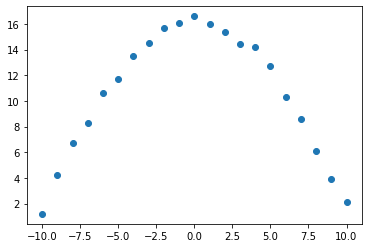

In [5]:
plt.scatter(data_array[:, 0], data_array[:, 1])

## 2-ب

In [6]:
def getGaussianDist(X, a, mu, sigma):
    result = a * np.exp(-0.5 * ((X - mu) / (sigma)) ** 2)
    return result

## 2-ج

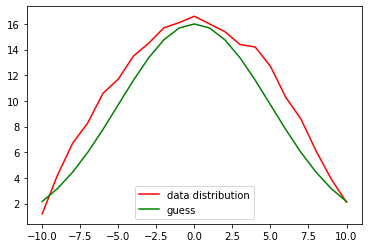

In [7]:
X = data_array[:, 0]
y = data_array[:, 1]

# a, mu, and sigma guess values
a_init = 16
mu_init = 0
sigma_init = 5

y_pred = getGaussianDist(X, a_init, mu_init, sigma_init)

plt.plot(X, y, color = 'r', label = 'data distribution')
plt.plot(X, y_pred, color = 'g', label = 'guess')
plt.legend()

In [8]:
def getMSE(y1, y2):
    result = np.mean((y1 - y2) ** 2)
    return result

In [9]:
print(getMSE(y, y_pred))

3.0464847120981164


<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
به ازای مقادیر $a$، $\mu$ و $\sigma$ به ترتیب 16، 0 و 5 خطای به دست آمده تقریبا 3/05 است.</li>
<br/>
	</font>
</div>

## 2-د

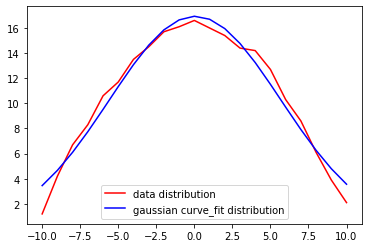

In [12]:
# using curve_fit function in scipy to calculate parameters of gaussian function
gaussian_fitted_param, gaussian_fitted_param_cov = curve_fit(getGaussianDist, X, y)

gaussian_fitted_y_pred = getGaussianDist(X, gaussian_fitted_param[0], gaussian_fitted_param[1], gaussian_fitted_param[2])

plt.plot(X, y, color = 'r', label = 'data distribution')
#plt.plot(X, y_pred, color = 'g', label = 'guess distribution')
plt.plot(X, gaussian_fitted_y_pred, color = 'b', label = 'gaussian curve_fit distribution')
plt.legend()

In [13]:
print(getMSE(y, gaussian_fitted_y_pred))

0.7105533649796423


<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
خطای پیشبینی در این حالت تقریبا 0/71 است.</li>
<br/>
	</font>
</div>

## 2-ه

In [15]:
def getCos(X, a, b):
    result = a * np.cos(b * X)
    return result

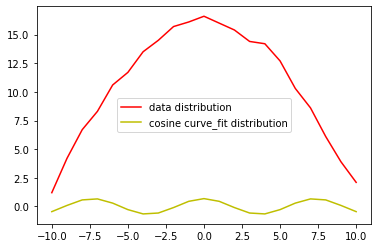

In [16]:
# using curve_fit function in scipy to calculate parameters of gaussian function
cosine_fitted_param, cosine_fitted_param_cov = curve_fit(getCos, X, y)

cosine_fitted_y_pred = getCos(X, cosine_fitted_param[0], cosine_fitted_param[1])

plt.plot(X, y, color = 'r', label = 'data distribution')
#plt.plot(X, y_pred, color = 'g', label = 'guess distribution')
#plt.plot(X, gaussian_fitted_y_pred, color = 'b', label = 'gaussian curve_fit distribution')
plt.plot(X, cosine_fitted_y_pred, color = 'y', label = 'cosine curve_fit distribution')

plt.legend()

In [17]:
print(getMSE(y, cosine_fitted_y_pred))

135.78758804144437


## 2-و

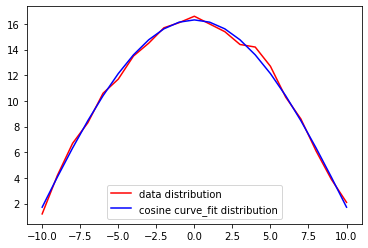

In [18]:
# a and b guess values
a_init = 16.93507011
b_init = np.pi / 20

# using curve_fit function in scipy to calculate parameters of cosine function given the initial guesses for parameters
guess_cosine_fitted_param, guess_cosine_fitted_param_cov = curve_fit(getCos, X, y, np.array([a_init, b_init]))

guess_cosine_fitted_y_pred = getCos(X, guess_cosine_fitted_param[0], guess_cosine_fitted_param[1])

plt.plot(X, y, color = 'r', label = 'data distribution')
#plt.plot(X, y_pred, color = 'g', label = 'guess distribution')
#plt.plot(X, gaussian_fitted_y_pred, color = 'b', label = 'gaussian curve_fit distribution')
plt.plot(X, guess_cosine_fitted_y_pred, color = 'b', label = 'cosine curve_fit distribution')

plt.legend()

In [19]:
print(getMSE(y, guess_cosine_fitted_y_pred))

0.09479772192520171


<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
خطای پیشبینی در این حالت تقریبا 0/09 است.</li>
<br/>
	</font>
</div>